## Лабораторная работа № 4

### Задание № 4

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Чтение таблицы x - f(x) из файла

xArr = np.zeros((10), dtype = float)
yArr = np.zeros((10), dtype = float)

openFile = np.loadtxt("data.csv")
for i in range(10):
    xArr[i] = openFile[i + 220][0]
    yArr[i] = openFile[i + 220][1]

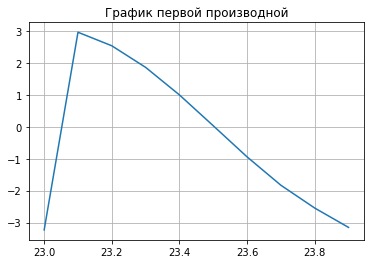

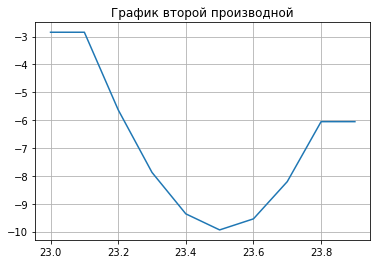

In [3]:
# Для трёх узлов

dy = np.zeros((10), dtype = float)
d2y = np.zeros((10), dtype = float)

for i in range(10):
    if i == 0:
        dy[i] = -(3 * yArr[i] + 4 * yArr[i + 1] - yArr[i + 2]) / 0.2
        d2y[i] = (yArr[i] - 2 * yArr[i + 1] + yArr[i + 2]) / 0.01
    elif 0 < i < 9:
        dy[i] = (yArr[i + 1] - yArr[i - 1]) / 0.2
        d2y[i] = (yArr[i - 1] - 2 * yArr[i] + yArr[i + 1]) / 0.01
    else:    
        dy[i] = (yArr[i - 2] - 4 * yArr[i - 1] + 3 * yArr[i]) / 0.2
        d2y[i] = (yArr[i - 2] - 2 * yArr[i - 1] + yArr[i]) / 0.01
    
fig0 = plt.figure()
plt.title('График первой производной')
axes0 = fig0.add_subplot(111)
axes0.grid()
axes0.plot(xArr, dy)

fig1 = plt.figure()
plt.title('График второй производной')
axes1 = fig1.add_subplot(111)
axes1.grid()
axes1.plot(xArr, d2y)

plt.show()

In [4]:
# Поиск базисных полиномов многочлена Лагранжа

def l(xk):
    global xArr
    x = sp.symbols('x')
    p = 1
    for i in range(10):
        if xArr[i] != xk:
            p *= (x - xArr[i]) / (xk - xArr[i])
    return p

In [5]:
# Построение интерполяционного многочлена Лагранжа

Lagrange = 0
for i in range(10):
    Lagrange += yArr[i] * l(xArr[i])

In [6]:
# Нахождение производных

df  = sp.diff(Lagrange)
d2f = sp.diff(df)

dfArr = np.zeros((100), dtype = float)
d2fArr = np.zeros((100), dtype = float)

new_xArr = np.zeros((100), dtype = float)
new_xArr[0] = xArr[0]
new_xArr[99] = xArr[9]
for i in range(1, 99):
    new_xArr[i] = xArr[0] + i * 0.01
    
x = sp.symbols('x')
for i in range(100):
    dfArr[i] = df.subs(x, new_xArr[i])
    d2fArr[i] = d2f.subs(x, new_xArr[i])

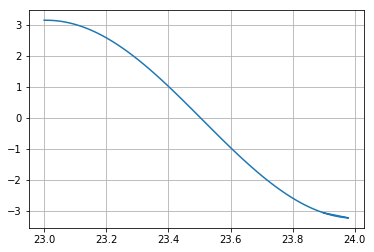

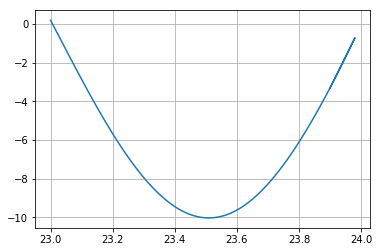

In [7]:
# Построение графиков

fig0 = plt.figure()
axes0 = fig0.add_subplot(111)
axes0.grid()
axes0.plot(new_xArr, dfArr)

fig1 = plt.figure()
axes1 = fig1.add_subplot(111)
axes1.grid()
axes1.plot(new_xArr, d2fArr)

plt.show()